---
# Welcome to CE880
### This is your week-4 : Problem notebook

For this problem set, we'll be using the Jupyter notebook and please upload this notebook to [Google Colab](https://colab.research.google.com/). 

### Task: Complete all the three questions given as follows:

In [1]:
# install sklearn package if you are using local computer and if you are using Google Coalb then skip this step
!pip install -U scikit-learn

     |████████████████████████████████| 9.5 MB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 36.5 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles, make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
scaler = StandardScaler()

---
## Question 1: 
We have already loaded `moon` data for you using `make_moons` function. 

Write a code to perform `k-means` clustering on `scaled_features` variable and return `silhouette_score` as an output

In [2]:
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f411c091700>
Traceback (most recent call last):
  File "/home/shikhar/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/shikhar/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/shikhar/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/shikhar/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

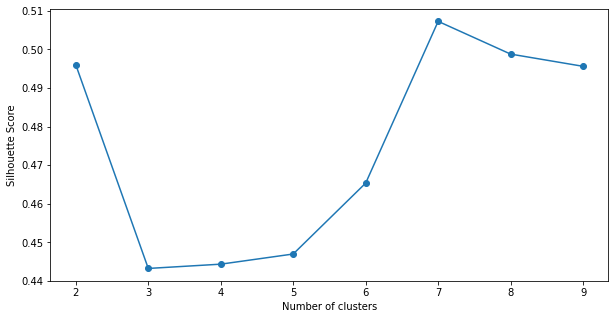

In [3]:
# Let's make two moons, where n is the number of samples
# fit_transform() method is basically the combination of fit method and transform method, 
# it is equivalent to fit().transform(). This method performs fit and transform on the 
# input data at a single time and converts the data points. 
# If we use fit and transform separate when we need both then it 
# will decrease the efficiency of the model so we use fit_transform() 
# which will do both the work.
scaled_features = scaler.fit_transform(features)
myscore= []

def decide_n_clusters(scaled_features):
    clusters = range(2,10)
    for cluster in clusters:
        dummy_km = KMeans(n_clusters=cluster, init='k-means++', n_init=1)
        dummy_km.fit(scaled_features)
        dummy_km.labels_
        sil_score = silhouette_score(scaled_features,dummy_km.labels_)
        myscore.append(sil_score)
    
    df = pd.DataFrame({'Cluster': range(2,10), 'Silhouette': myscore})
    plt.figure(figsize=(10,5))
    plt.plot(df["Cluster"], df['Silhouette'], marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')

decide_n_clusters(scaled_features)
# above function tells us that 2 is the best no.of clusters that we should use for Kmeans implementation

In [4]:
def myScore_kmean(scaled_features):
    """Write code to perform k-means clustering and print silhouette_score"""
    # YOUR CODE HERE
    km = KMeans(n_clusters=2, init='k-means++')
    km.fit(scaled_features)
    km.labels_
    # print(km.labels_)
    myscore=silhouette_score(scaled_features,km.labels_)
    print("Silhouette_score : {}".format(myscore))
    return myscore
    raise NotImplementedError()

In [ ]:
# Check you solution by running this cell
import math
assert math.isclose(myScore_kmean(scaled_features), 0.5, rel_tol=0.10)

---
## Question 2: 

Write a code to perform `DBSCAN` clustering algorithm on `scaled_features` and return `silhouette_score` as an output. Please set the `eps` = 0.2 and `min_samples` = 5

In [7]:

# Let's make two moons, where n is the number of samples
from sklearn.datasets import make_moons
features, true_labels =  make_moons(n_samples=250, noise=.1)
scaled_features = scaler.fit_transform(features)

"""Write code to perform DBSCAN algorithm and print silhouette_score"""
# YOUR CODE HERE
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(scaled_features)
print(dbscan.labels_)
score = silhouette_score(scaled_features,dbscan.labels_)


[ 0  5  1  2  0  8 -1  0  0  3  4 -1  0  4  0 -1  1  1  2  0  2  4  1  5
  2  6  1  2  2  0 -1  1  2  1  3  0  0  2  1  2  0  0  0  1 -1  2  0  6
  4  2  2  2  0 -1  2 -1  0  2  1  6  1  5  3  6  0  0  5  7  2 -1  1  2
  3  0  2  4  1 -1  2  3  0  7  1  2  0  2  4  0  0  5 -1  0  1  2  7  1
  2  0  2  0  0 -1  1  2 -1 -1  0  2  0  0  2  0 -1  2  1  2  0  0  0  2
  0  2  2  0  6  2 -1 -1  2  2  0 -1  0  0  2  1  0  5  1  0  6  3  4  0
  7  0  2  0  2  4  0  7  0  6  3  2  0  0  3  5  1 -1  1  0  0  0  2  2
  0  2  2  0  0  4  0  3  0  1 -1  3  0  2  6  2  0 -1 -1  5  5  4  1  0
  0  0 -1 -1  0  0  8  2  0  1 -1  1 -1  0  7  1  3  4 -1  1 -1  0  2  0
  0  0  3  1  5  0  1  1  1  0  7  0  1  0  7  0  5  0  0  0  0  1  8  6
  8  0  0  0  0  3  0  0  2  5]


In [10]:
def myScore_DBSCAN(scaled_features):
    """Write code to perform DBSCAN algorithm and print silhouette_score"""
    # YOUR CODE HERE
    dbscan = DBSCAN(eps=0.2, min_samples=5)
    dbscan.fit(scaled_features)
    score = silhouette_score(scaled_features,dbscan.labels_)
    print(score)
    return score
    raise NotImplementedError()

In [11]:
# Check you solution by running this cell
assert math.isclose(myScore_DBSCAN(scaled_features), 0.2, rel_tol=0.10)

0.20838115663016152


## Question 3: 

Complete this code perform `PCA`  on `iris data` and return `explained_variance_ratio_` as an output for the first two principal components (PCs)

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

def myPCA(x):
    """Complete this code return the explained variance ratio for the first two prinical 
    components after doing PCA on x """
    # YOUR CODE HERE
    pca_iris = PCA(n_components=0.95)
    features_pca = pca_iris.fit_transform(x)

    df_features_pca = pd.DataFrame(features_pca)
    corr_mat = df_features_pca.corr()
    sns.heatmap(corr_mat)
    print(pca_iris.explained_variance_ratio_)
    return pca_iris.explained_variance_ratio_

    raise NotImplementedError()

[0.72770452 0.23030523]


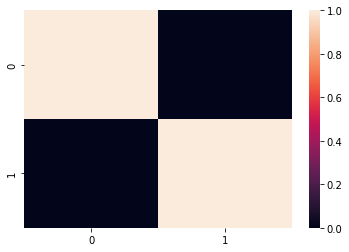

In [3]:
# Check you solution by running this cell
x= myPCA(x)
y = [0.7277045209380135, 0.23030523267680633]
np.testing.assert_allclose(x, y, rtol=1e-5, atol=0)
